## Implementing the deep learning model to classify the messages into spam and ham

### Importing Packages

In [1]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder


In [2]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mahjabeenmohiuddin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mahjabeenmohiuddin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mahjabeenmohiuddin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Loading Dataset

In [6]:
spam_data = pd.read_csv("/Volumes/DriveB/Ex_Files_Deep_Learning_Getting_Started/Exercise Files/Spam-Classification.csv")

print("\nLoading Data : \n-------------------------------------")
print(spam_data.head())


Loading Data : 
-------------------------------------
  CLASS                                                SMS
0   ham   said kiss, kiss, i can't do the sound effects...
1   ham      &lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2  spam  (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3  spam  * FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4  spam  **FREE MESSAGE**Thanks for using the Auction S...


### Splitting columns

In [7]:
spam_classes_raw = spam_data['CLASS']
spam_messages = spam_data['SMS']

### Creating a Custom tokenizer function to remove stopwords and use lemmatization

In [8]:
def customtokenize(str):
    #Split string as tokens
    tokens=nltk.word_tokenize(str)
    #Filter for stopwords
    nostop = list(filter(lambda token: token not in stopwords.words('english'), tokens))
    #Perform lemmatization
    lemmatized=[lemmatizer.lemmatize(word) for word in nostop ]
    return lemmatized

## Converting a collection of raw documents into a matrix of TF-IDF.

In [9]:

from sklearn.feature_extraction.text import TfidfVectorizer
#Build a TF-IDF Vectorizer model
vectorizer = TfidfVectorizer(tokenizer=customtokenize)

#Transform feature input to TF-IDF
tfidf=vectorizer.fit_transform(spam_messages)
#Convert TF-IDF to numpy array
tfidf_array = tfidf.toarray()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


### Instantiating Label encoder to encode class data

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
spam_classes= label_encoder.fit_transform(spam_classes_raw)

In [11]:
print("TF-IDF Matrix Shape : ", tfidf.shape)
print("One-hot Encodeing Shape : ", spam_classes.shape)

TF-IDF Matrix Shape :  (1500, 4566)
One-hot Encodeing Shape :  (1500, 2)


### Splitting data into train and test sets

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split( tfidf_array, spam_classes, test_size=0.2, random_state=42)

### Creating an Architecture

In [13]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2

NUM_CLASSES = 2
NUM_HIDDEN_NODES = 32

model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(NUM_HIDDEN_NODES,
                             input_shape=(X_train.shape[1],),
                             name = 'Hidden-Layer-1',
                             activation = 'relu'
                             ))
model.add(keras.layers.Dense(NUM_HIDDEN_NODES,
                             name = 'Hidden-Layer-2',
                             activation = 'relu'))
model.add(keras.layers.Dense(NUM_CLASSES,
                             name = 'Output-Layer',
                             activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)          │ (None, 32)             │       146,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-2 (Dense)          │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 147,266 (575.26 KB)

 Trainable params: 147,266 (575.26 KB)

 Non-trainable params: 0 (0.00 B)

### Fitting Model

In [14]:
VERBOSE = 1

BATCH_SIZE = 256
EPOCHS = 20
VALIDATION_SPLIT = 0.2

print("\nTraining Progress:\n---------------------------------")

history = model.fit(X_train,
                    Y_train,
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS,
                    verbose = VERBOSE,
                    validation_split = VALIDATION_SPLIT)


Training Progress:
---------------------------------
Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5108 - loss: 0.6929 - val_accuracy: 0.5167 - val_loss: 0.6893
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6072 - loss: 0.6836 - val_accuracy: 0.6708 - val_loss: 0.6799
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8139 - loss: 0.6686 - val_accuracy: 0.7833 - val_loss: 0.6655
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9008 - loss: 0.6473 - val_accuracy: 0.8542 - val_loss: 0.6462
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9668 - loss: 0.6208 - val_accuracy: 0.8792 - val_loss: 0.6233
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9746 - loss: 0.5900 - val_accuracy: 0.9083 - val_loss: 0.5978
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9749 - loss: 0.5548 - val_accuracy: 0.9250 - val_loss: 0.5696
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9811 - loss: 0

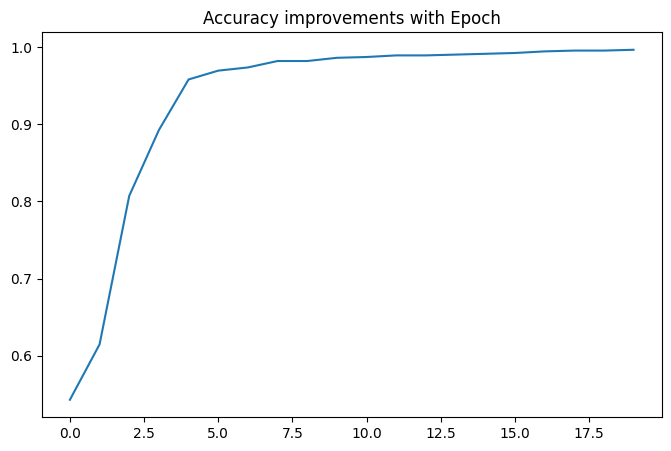

### Evaluating Model

In [16]:
print("\nEvaluation against Test Dataset :\n-----------------------------")
model.evaluate(X_test, Y_test)


Evaluation against Test Dataset :
-----------------------------
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.9653 - loss: 0.2058


[0.20882496237754822, 0.9666666388511658]

In [18]:
# Make predictions using the test set
test_index = 0  # Index of the test set sample to predict
print(predicted_input.shape)
raw_predictions = model.predict(predicted_input)
print("Prediction Output (Probabilities):", raw_predictions)

# Get the class with the highest probability
prediction = np.argmax(raw_predictions)

(1, 4566)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Prediction Output (Probabilities): [[0.01563982 0.98436016]]
Predicted class is ['spam']


## Results:
#### Epoch1 score: accuracy: 0.5108 - loss: 0.6929 - val_accuracy: 0.5167 - val_loss: 0.6893
#### Epoch10 score : accuracy: 0.9978 - loss: 0.1316 - val_accuracy: 0.9417 - val_loss: 0.2645
#### Evaluation score: 0.20882496237754822, 0.966

#### Therefore, it can be concluded that with the 10 epochs there is a loss in the error.
#### If accuracy score is considered as matrix, model could classify the data accurately 90%.